In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Relativa vs asboluta
df = pd.read_csv("../datasets/house_prices.csv")

In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Distribución

Histograma y ver la distribucion de los datos (KDE)

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

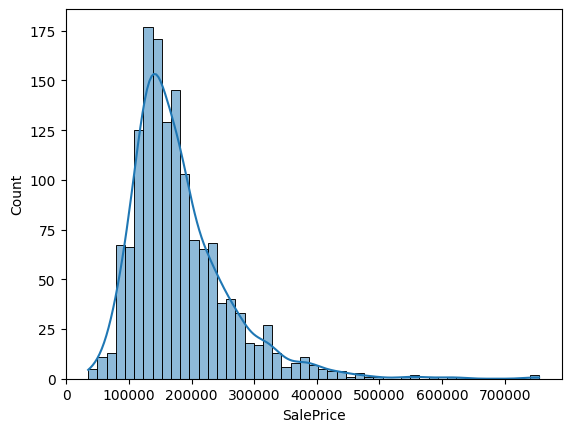

In [14]:
sns.histplot(data=df,x='SalePrice', kde=True)

In [16]:
print("Skewness (asimetria)",df['SalePrice'].skew())
print("Kurtosis (curtosis)", df['SalePrice'].kurt())

Skewness (asimetria) 1.8828757597682129
Kurtosis (curtosis) 6.536281860064529


### Asimetria

Indica si los datos están sesgados hacia la derecha o hacia la izquierda respecto a la media
Asimetria == 0 la distribución es perfectamente simétrica
Si es > 0 la distribución es asimétria hacia la derecha
Si es < 0 la distribución es asimétrica hacia izquierda


### Curtosis 

Mide la distribución de los datos y la concentración en las colas en comparación con una distribución normal

K = 3 curtosis normal (distribución normal)

a acompletar

In [17]:
corrmat = df.corr()

<AxesSubplot: >

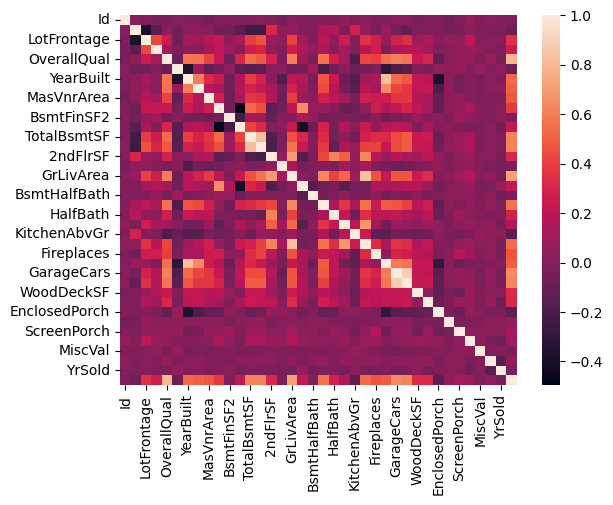

In [20]:
sns.heatmap(corrmat)

## Gran dimensionalidad en correlación

Ordenar de la correlación más alta a la más baja (y elegir un numero)

In [65]:
def bestCoefficients(corr,k):
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
    # print("Columnas con mayor correlación", cols)
    cm = np.corrcoef(df[cols].values.T) # las variables deben estar en columnas y observaciones en filas
    sns.heatmap(cm, annot=True, cmap='Blues',annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    return cols

In [66]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

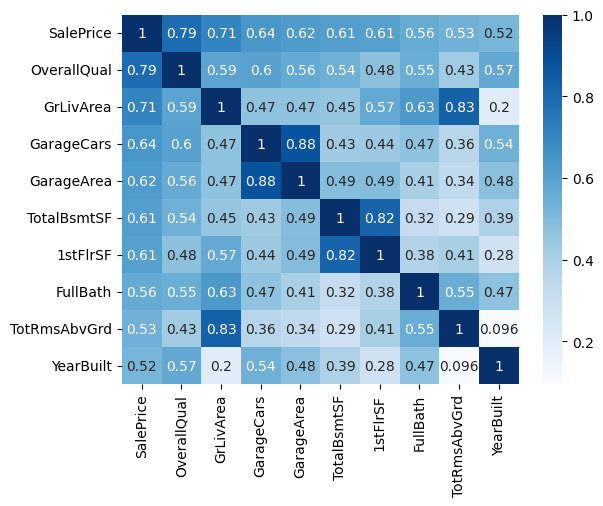

In [47]:
cols = bestCoefficients(corrmat,10)

In [48]:
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [36]:
def suma(a,b):
    suma = a + b
    return suma

In [32]:
def potenciaDeDos(a):
    potencia = a ** 2
    return potencia

In [49]:
# consigna: sumar dos elementos y ese resultado elevarlo al cuadrado
suma_elementos = suma(5,11)
potencia_elementos = potenciaDeDos(suma_elementos)
print(potencia_elementos)

256


In [51]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [52]:
df.fillna(df.median(),inplace=True) # reemplaza por la media de cada columna, los valores nulos

/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_9935/3934904876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True) # reemplaza por la media de cada columna, los valores nulos


In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

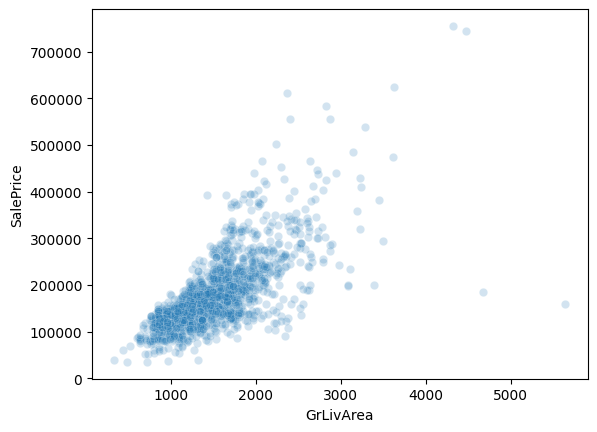

In [58]:
sns.scatterplot(data=df,y='SalePrice',x='GrLivArea',alpha=0.2)

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

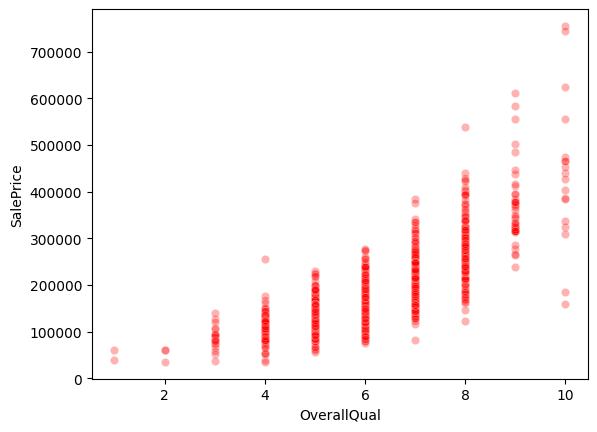

In [61]:
sns.scatterplot(data=df,y='SalePrice',x='OverallQual',alpha=0.3, c='red')

<AxesSubplot: xlabel='GarageCars', ylabel='SalePrice'>

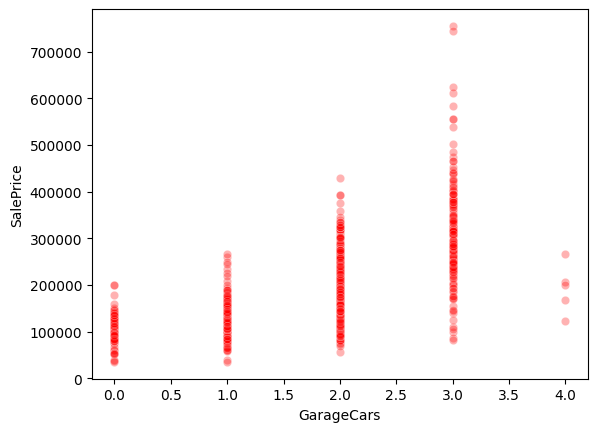

In [63]:
sns.scatterplot(data=df,y='SalePrice',x='GarageCars',alpha=0.3, c='red')

<AxesSubplot: xlabel='GarageArea', ylabel='SalePrice'>

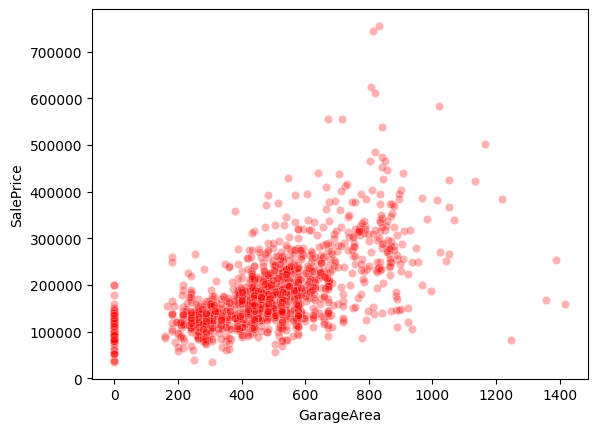

In [67]:
sns.scatterplot(data=df,y='SalePrice',x='GarageArea',alpha=0.3, c='red')

<AxesSubplot: xlabel='SaleCondition', ylabel='SalePrice'>

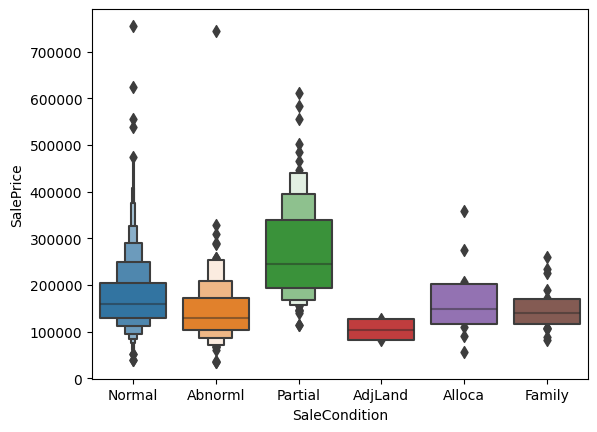

In [70]:
sns.boxenplot(data=df,y='SalePrice', x='SaleCondition')

## Transformaciones de variables

Siempre que apuntemos a la predicción o clasificación mediante un modelo de ML debemos transformar nuestras variables categóricas en numericas (discretas)

- Pandas : get_dummies (crea nuevas columnas con 0 y 1) -> Regresión
- LabelEncoder -> transformación de valores categóricos ORDINALES (Regresión y modelos en general de ML)

In [71]:
# sklearn

In [72]:
# pip install sklearn # primer paso: instalación

In [73]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

In [75]:
le.fit(df['SaleCondition']) # df['SaleCondition']

LabelEncoder()

In [82]:
df['SaleCondition'] = le.transform(df['SaleCondition']) # reemplazo la columna SaleCondition por el nuevo valor

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,4,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,4,181500


### Hexbin

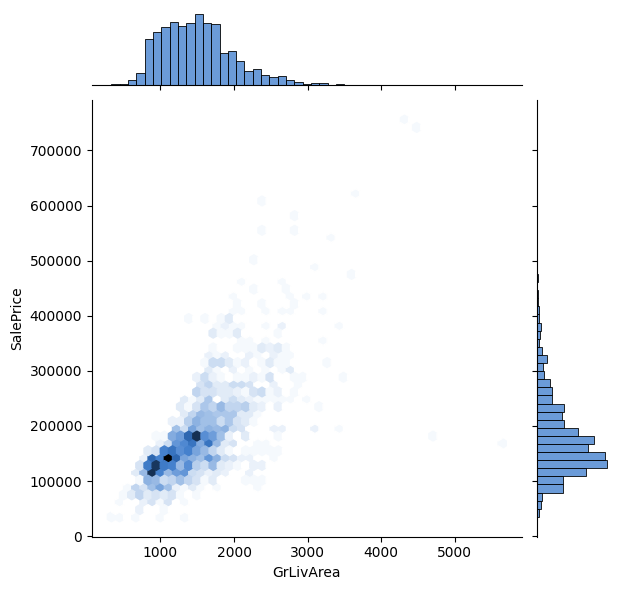

In [88]:
# https://htmlcolorcodes.com/es/
# colores hexadecimales
sns.jointplot(data=df,x='GrLivArea',y='SalePrice', kind="hex", color='#3A7ACC')